# Classification and Regression Trees (CART)

In [1]:
# Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay

C:\Users\prani\AppData\Local\Temp\ipykernel_19932\841749719.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---
## ML Challenges - Model Underfitting vs Overfitting:

There are two main <font color=#14F278>**Machine Learning Challenges**</font>:
- **"Bad" Data**:
    - insufficient quantity of training data
    - non-representative training set
    - poor quality of data
    - irrelevant features/predictors
- **"Bad" Model**:
    - <font color=#14F278>**Overfitting**</font> - when the model <font color=#14F278>**'memorises'**</font> the training data and <font color=#14F278>**fails to generalise**</font> on unseen data
    - <font color=#14F278>**Underfitting**</font> - when the model is <font color=#14F278>**too simple**</font> and <font color=#14F278>**fails to learn**</font> the underlying logic, structure and intricacies of the data

---
### Model Bias and Variance:

The <font color=#14F278>**Bias of a Model**</font> measures how different the model predictions are, on average, compared to the true values on a given dataset.
\
The <font color=#14F278>**Variance of a Model**</font> measures how sensitive the model predictions are to small variations in the input data:
- Suppose we have an observation with a known true target value:
- Suppose we take the model and train it multiple times, each time on different training set
- Each trained model produces a prediction for the target value
- We can <font color=#14F278>**compare the predictions to the true value**</font> to see how far off they are from the actual label - this measures the <font color=#14F278>**model bias**</font>
- We can also <font color=#14F278>**compare the predictions to one another**</font> to see how clustered or dispersed they are from one another - this measures the <font color=#14F278>**model variance**</font>
- A model with <font color=#14F278>**high bias**</font> indicates <font color=#14F278>**Underfitting**</font> - the model predictions are far away from the true value - the model fails to correctly capture the relationship between features and label
- A model with <font color=#14F278>**high variance**</font> indicates <font color=#14F278>**Overfitting**</font> - the model predictions are way too sensitive to changes in the training data - the model thus fails to generalise - a slight change to the training data can lead to a significant difference in the predicted value
- <font color=#FF8181>**Note: There is a trade-off between Bias and Variance!**</font>

---
## Decision Trees:

A <font color=#14F278>**Decision Tree**</font> is a <font color=#14F278>**non-linear model**</font> where the input data is iteratively split into branches in a top-down tree-like structure, <font color=#14F278>**based on some conditions**</font>. **Decision Trees** can be applied both to <font color=#14F278>**Regressions**</font> and <font color=#14F278>**Classifications**</font>. 

---
### CART - Classification and Regression Trees:
<font color=#14F278>**Classification and Regression Trees (CART)**</font> work by <font color=#14F278>**partitioning**</font> the feature space into <font color=#14F278>**disjoint regions**</font>, based on a <font color=#14F278>**binary condition**</font>. Each region is then assigned a <font color=#14F278>**constant prediction**</font>:
- Suppose we have 2 features in our feature space - $x_{1}$ and $x_{2}$:
- We start splitting the feature space based on some binary conditions - e.g.,  $x_{1}<=5$, or $x_{2}>2$
- The optimal split will result in a number of disjoin regions - here, there are 5 regions
- Once the optimal split is produced, each region is associated with a <font color=#14F278>**constant prediction**</font> - e.g. region $R_{m}$ is assigned prediction value $c_{m}$ 

<center>
    <div>
        <img src="machine-learning-concepts/Dataset_1_animals/images/CART_split.JPG"/>
    </div>
</center>

Some terminology:
- <font color=#14F278>**Root Node**</font>: NO *parent* node, condition results in 2 *children* nodes
- <font color=#14F278>**Internal Node**</font>: one *parent* node, condition results in 2 *children* nodes
- <font color=#14F278>**Leaf Node**</font>: one *parent* node, NO *children* nodes - associated with a *prediction*


As the image suggests, <font color=#14F278>**CART**</font> work by splitting the *feature space* into disjoin regions, based on some rules - e.g. $x_{1}<=5$, or $x_{2}>2$. Once the most optimal split is performed, all data points in each region are assigned a **constant prediction** - e.g. region $R_{m}$ is assigned prediction value $c_{m}$:


---
### Regression Trees - How Do They Work?

<center>
    <div>
        <img src="machine-learning-concepts/Dataset_1_animals/images/Regression_Trees.JPG"/>
    </div>
</center>

- We start with our **training data**, which consists of features and **known real-valued labels**
- We perform an <font color=#14F278>**Optimal Split**</font> of the feature space, which defines the <font color=#14F278>**disjoint regions**</font>
- Each region $R_{m}$ is assigned a constant prediction $c_{m}=\frac{1}{N_{m}}\sum_{i| x_{i} \in R_{m}}y_{i}$
- Intuitively, the prediction $c_{m}$ for region $R_{m}$ is the <font color=#14F278>**average of the labels for all training set observations in that region**</font>
- When the model is used on a new unseen observation (test data), the observation is placed within one of the regions (based on its features), and assigned the constant prediction of that region

---
### Classification Trees - How Do They Work?

<center>
    <div>
        <img src="machine-learning-concepts/Dataset_1_animals/images/Classification_Trees.JPG"/>
    </div>
</center>

- We start with our **training data**, which consists of features and **known categorical labels**
- We perform an <font color=#14F278>**Optimal Split**</font> of the feature space, which defines the <font color=#14F278>**disjoint regions**</font>
- Each region $R_{m}$ is assigned a constant prediction $c_{m}$ which is the <font color=#14F278>**dominating class in the region**</font>
- When the model is used on a new unseen observation (test data), the observation is placed within one of the regions (based on its features), and assigned the constant prediction (class) of that region

---
### Recursive Binary Splitting:

**Recursive Binary Splitting** is a **top-down, greedy algorithm**, used to grow Decision Trees:
- The algorithm is performed iteratively on the tree
- On each iteration, the algorithm solves for 2 components - <font color=#14F278>**the optimal feature**</font>, on which to perform the split, and the <font color=#14F278>**optimal feature cut-off value**</font> for the split - e.g., on the first split, the optimal feature to split by is $x_{1}$ and the cut-off value for the split is $x_{1} =5$
- Recursive Binary Splitting is <font color=#14F278>**greedy**</font> as it is <font color=#14F278>**not forward-looking**</font> - each split is optimised in isolation to the splits that come after (further down the tree)
- Each split results in <font color=#14F278>**two regions**</font>, associated with a constant prediction
- For <font color=#14F278>**Regression problems**</font>, the optimal split results in the <font color=#14F278>**Lowest Sum of Squared Losses**</font> across the two regions
- For <font color=#14F278>**Classification problems**</font>, the optimal split results in the <font color=#14F278>**Highest Information Gain**</font> across the two regions 

---
#### Cross Entropy and Gini Index:
**Recursive Binary Splitting** can involve calculating the **Information Gain** of a split for Classification:
- Suppose that $\hat{p_{mk}}$ is the <font color=#14F278>**proportion of observations**</font> in region $R_{m}$ from class $k$:
- The split with the <font color=#14F278>**highest information gain**</font> is the split that results in the <font color=#14F278>**lowest node impurity**</font> in the two regions of the split
- <font color=#14F278>**Node Impurity**</font> is measured via one of the below metrics:

$$
Cross Entropy = - \sum_{k=1}^{K}\hat{p_{mk}}log(\hat{p_{mk}})
$$

$$
Gini Index = \sum_{k=1}^{K}\hat{p_{mk}}(1-\hat{p_{mk}})
$$

- The two measures produce similar results so let's focus on the <font color=#14F278>**Gini Index**</font>
- The <font color=#14F278>**Gini Index**</font> intuitively measures the <font color=#14F278>**purity of classification**</font> in each region
- For 2-class problem, it varies from **0 to 0.5** with **0** indicating perfect node purity (all observations belong to the same class) and **0.5** indicating dead-heath (observations are equally distributed across classes)
- <font color=#14F278>**To maximise information gain, we want to minimise node impurity, i.e., we want the split to result in regions with a clear dominating class**</font>


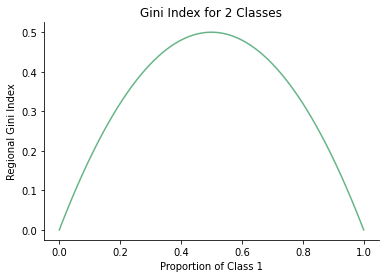

In [2]:
# How Gini Index Measures Node Impurity
# Example for 2 Classes: 
    # Class 1 with proportion P1
    # vs
    # Class 2 with proportion P2 = 1 - P1

# Create a range of possible values for P1 - it ranges from 0 to 1
p1 = np.linspace(0,1, 100)

# Define a Gini Index Function
def gini(x):
    return 2*x*(1-x)

# Calculate the Gini Index for each possible pair of P1 and P2 values
gini_index = []
for i in p1:
    gini_index.append(gini(i))

# Plot the Gini Index against P1 to see how Node Impurity peaks when we have 50-50% proportion across classes
g = sns.lineplot(x = p1, y= gini_index, color = '#67B587')
g.set_title('Gini Index for 2 Classes')
g.set(xlabel = 'Proportion of Class 1', ylabel = 'Regional Gini Index')
sns.despine()
plt.show()

---
## Decision Tree - Animal Classification:
Using a **Decision Tree** to perform **Classification** on the Animal dataset, stored in `animals.csv` in the **data** folder:
- The dataset containts 144 observations across different types of animals
- Each observation has information such as **hair, feathers, legs, milk**, etc. which will serve as **features**
- Each observation has a **class type** which is the target we want to predict

In [ ]:
# Load data

filepath = r'../data/animals.csv'
df = pd.read_csv(filepath)
df.head()

In [ ]:
# Count of Class Type of the animal:

df['class_type'].value_counts()

### Training and Plotting a Decision Tree

- To train a Decision Tree, use the `DecisionTreeClassifier()` class from `sklearn.tree` (Note - for Regression, use the `DecisionTreeRegressor()` class)
- Perform a train-test split on the data with <font color=#14F278>**stratified sampling**</font> - this is because we currenly have an <font color=#14F278>**imbalanced class representation**</font> - 41 mammal observations, 20 fish, etc. Stratification will preserve the original proportions in the test and train data (to the extent to which it is possible)
- Create a `DecisionTreeClassifier()` model with a <font color=#14F278>**maximum depth**</font> of 3 - maximum depth is a <font color=#14F278>**Hyperparameter**</font>, which controls how much the tree grows.
- Fit the model to the training data
- <font color=#14F278>**Plot the Decision Tree**</font> via the `plot_tree()` function from `sklearn.tree` 

In [ ]:
# Train-Test Split and Feature Selection
X = df.drop(columns = ['animal_name', 'class_type'])
y = df['class_type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123, stratify=y)

# Create a Decision Tree Classifier Model and fit to train set
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

In [ ]:
# To visualise the tree, use the plot_tree function
fig, ax = plt.subplots(figsize = (16,16))
plot_tree(model, feature_names = model.feature_names_in_, class_names = model.classes_)
plt.show()

In [ ]:
# Finally, test model by making predictions on the test data
y_pred = model.predict(X_test)

# Visualise Confusion Matrix to assess how many false predictions your model made
fig, ax = plt.subplots(figsize = (12,12))
g=ConfusionMatrixDisplay.from_predictions( y_test, y_pred, ax = ax, cmap = 'BuGn')

# Hyperparameter Tuning
---

**Decision Trees** are Machine Learning Models with 
**Hyperparameters** - they are like tuning knobs for the model, to which we assign values before training and evaluating the model.

---
## Hyperparameters - Definition:

A **Hyperparameter** is a parameter, whose value is used to <font color=#14F278>**control the learning process of a model**</font>. Hyperparameters are like tuning knobs for a model - we set them to a particular value in advance, then train and evaluate the model.
- For example, <font color=#14F278>**KNN**</font> has 2 hyperparameters - <font color=#14F278>**K - number of neighbours**</font>, and <font color=#14F278>**p - distance norm**</font>.
- Decision Trees have a number of hyperparameters, one of which is  <font color=#14F278>**maximum depth**</font>, controling how deep the tree grows  
- Hyperparameters are ultimately used to ensure that the model is a good fit for the task - a good choice of Hyperparameters allows us to prevent ML Challenges such as **Overfitting** or **Underfitting a model**


---
### Decision Trees - Hyperparameters:
**Decision Trees are prone to Overfitting**. If we keep applying **Recursive Binary Splitting** to a tree, eventually, each data point may **end up in its own leaf node/region**. This means that the model becomes too sensitive to little changes in the input data, resulting in a **High Variance** - hence overfitting the model. 

We can **control the complexity** of the tree via the following Hyperparameters:

<center>
    <div>
        <img src="machine-learning-concepts/Dataset_1_animals/images/Hyperparameter_Def.JPG"/>
    </div>
</center>

In general, <font color=#FF8181>**decreasing the maximum**</font> of a hyperparameter, such as `max_depth`, or <font color=#FF8181>**increasing the minimum**</font> of a hyperparameter, such as `min_samples_leaf`, will <font color=#FF8181>**reduce the complexity of the model, hence the model variance**</font> and ultimately <font color=#FF8181>**prevent from Overfitting!**</font>

---
## Hyperparameter Tuning:
---
### Validation Sets:
- Suppose we want to find the **best hyperparameters** for a particular ML problem.
- So far, we looked at splitting our data into **train and test sets**.
- If we use the training set to **'tune' hyperparameters** over and over again, and use the **test set** to evaluate which hyperparameter values perform best, we are essentially **using the test set as part of the model training process**!
- This is undesirable, because the purpose of test data is to **emulate** testing the model on unseen data.
- Instead, we can split our data into **three sets:**
    - **Train**
    - **Validation**
    - **Test**

---
### K-Fold Cross Validation:

- Instead of splitting the original training set into a single train and validation set, we can perform **a number of splits**:
- Split the train set into <font color=#14F278>**K non-overlapping subsets of data**</font> - also called **folds**
- Take <font color=#14F278>**k-1 folds**</font> to train your model on and use the remaining fold for **validation**
- Repeat the above step <font color=#14F278>**k times**</font>, each time, leaving a new fold out for validation, and using the rest for training
- At the end, **average the performance estimates** across **all k validation folds** for which typical values for k are **k=5** or **k=10**
- **Note:** K-Fold CV is used for Hyperparameter tuning - each model, trained with this approach, has different hyperpatameter values. The end goal of k-Fold CV is to find the model with the optimal hyperparameter values!

<center>
    <div>
        <img src="machine-learning-concepts/Dataset_1_animals/images/Kfold_CV_Method.JPG"/>
    </div>
</center>



---
### Grid Search CV:
- **Question: How do we pick the possible combinations of hyperparameter values to run through the K-Fold CV?**
- **Answer: We can use a technique, called Grid Search CV**

**Grid Search CV** is a popular approach of exploring different combinations of hyperparameter values, by creating a **Hyperparameter Grid**:

<center>
    <div>
        <img src="machine-learning-concepts/Dataset_1_animals/images/Hyperparameter_Grid.JPG"/>
    </div>
</center>

- **Grid Search CV** is implemented via the `GridSearchCV()` in `sklearn.model_selection`
- We create an instance of the class, passing the following arguments:
    - `estimator` - assigned to the instance of the model we want to tune the hyperparameters for
    - `param_grid` - assigned to a dictionary of list values, where the keys are the **hyperparameter names** and the list values contain the ranges of values we want to search from
    - `cv` - the number of folds, used for the **Cross Validation** - e.g., `cv=5`
- The instance of the `GridSearchCV()` class implements `fit()` and `predict()` methods, which we use in the standard ways, by passing our train and test datasets

---
### Grid Search CV - Example (using animals.csv):
- Training a **Decision Tree Classifier** and tuning its hyperparameters with **Grid Search CV**
- The focus will be on two of the hyperparameters - `max_depth` and `min_samples_leaf`


In [ ]:
# Loading the data
filepath = r'../data/animals.csv'
df = pd.read_csv(filepath)
df.head()

In [ ]:
# Train-Test Split and Feature Selection
X = df.drop(columns = ['animal_name', 'class_type'])
y = df['class_type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123, stratify=y)

# Initialise Decision Tree Classifier
model = DecisionTreeClassifier()

In [ ]:
# Import GridSearch CV from sklearn
from sklearn.model_selection import GridSearchCV


# Pass Ranges for Hyperparameters
parameters = {'max_depth':        [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [5, 10, 20]}  

# Initialise a Grid Search object
# passing the decision tree estimator and the parameter grid values
clf = GridSearchCV(estimator = model, param_grid = parameters, cv=5)

# Fit the Grid Search object to the train data
# At this stage, the model is learning the optimal hyperparameter values by performing the Grid Search
clf.fit(X_train, y_train)

# Once the model's hyperparameters are tuned, we can make predictions
y_pred = clf.predict(X_test)

- Apart from predicting, once the model is fit to the data, we can also **Optimal Hyperparameter Values**, found by the Grid Search CV
- We can use the `best_estimator_.max_depth` or `best_estimator_.min_samples_leaf` attributes to find the optimal combination

In [ ]:
# Retrieve the optimal hyperparamer values, found by Grid Search CV
best_depth = clf.best_estimator_.max_depth
best_min_samples = clf.best_estimator_.min_samples_leaf

print(f'best estimator: depth {best_depth} and min_samples {best_min_samples}')

- Lastly, proceed with the final model evaluation by using the test set
- We can plot the **Confusion Matrix** or calculate the **Accuracy Score** of the model
- Recall that, above,  we trained a Decision Tree Classifier with `max_depth=3`
- This time, we tuned the Hyperparameters of the same model with `GridSearchCV`
- Below is a quick example comparison between the Confusion Matrix <font color=#14F278>**before and after Hyperparameter Tuning:**</font>

<center>
    <div>
        <img src="machine-learning-concepts/Dataset_1_animals/images/Hyperparameter_Tuning_Effects.JPG"/>
    </div>
</center>

In [ ]:
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score is {acc_score}')

# Visualise Confusion Matrix to assess how many false predictions your model made
fig, ax = plt.subplots(figsize = (12,12))
g=ConfusionMatrixDisplay.from_predictions( y_test, y_pred, ax = ax, cmap = 'BuGn')

- Lastly, we can directly train a `DecisionTreeClassifier` with the optimal values for the hyperparameters
- Plot the Decision Tree with `plot_tree` to see how the hyperparameter values controlled the depth of the tree and the number of samples in each leaf node

In [ ]:
# Initialise Decision Tree Classifier
model = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=5 )

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy score is {acc_score}')

fig, ax = plt.subplots(figsize = (16,16))
plot_tree(model, feature_names = model.feature_names_in_, class_names = model.classes_)
plt.show()